### [McOpt (Multi-commodity Optimal Transport)](https://github.com/aleable/McOpt)

#### Contributors:
- Alessandro Lonardi
- Enrico Facca
- Caterina De Bacco

In [16]:
from main import *

!pip install nbimporter
import nbimporter
import dashboard_misc

import pickle5 as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Initialization

The parameters needed to run **McOpt** are the following:


- ***Problem construction***

    - ```method``` = ```"synth"``` or ```"paris"```: choose which graph topology you want to build, use ```synth``` to generate a [Waxman graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.waxman_graph.html), ```paris``` to build the Paris metro network
    
    - ```coupling``` = ```"l1"``` or ```"l2"```: choose which function you want to use to couple the fluxes, ```"l1"``` corresponds to $f(x) = ||x||_1^2$, ```"l2"``` to $f(x) = ||x||_2^2$
    
    - ```museed``` (```type=int```): seed for the conductivities random initialization $\mu_e(0) \sim U(0,1)$
    
    - ```pflux``` (```type=float```): $0 < \beta < 2$, regulatory parameter for traffic congestion
    
    - ```rho``` (```type=float```): $0 \leq \rho \leq 1$, regulatory parameter for the input loads. The nodes inflows, $g$, can be updated as $g \leftarrow g - \rho(g - \langle g \rangle)$, with $\langle g \rangle := 1/|V| \sum_{v \in V} g_v$


- ***Dynamics parameters***
    
    - ```time_step``` (```type=float```): time step for the finite difference discretization
    
    - ```tot_time``` (```type=int```): upper bound on the number of time steps (safety variable)
    
    - ```relax_linsys``` (```type=float```): relaxation for the weighted Laplacian
    
    - ```tau_cond_dyn``` (```type=float```): threshold for convergence, using the conductivities
    
    - ```tau_cost_dyn``` (```type=float```):  threshold for convergence, using the cost
    
    
- ***Fixed-point (Optimization) scheme parameters***

    - ```tau_cond_opt``` (```type=float```): threshold for convergence, using the conductivities
    
    - ```tau_cost_opt``` (```type=float```): threshold for convergence, using the cost
    
 
- ***Misc***
    
    - ```VERBOSE``` (```type=bool```)

In [17]:
# Problem construction
method = "paris" 
coupling = "l2"
museed = 0
pflux = 1.0
rho = 0.0

# Dynamics parameters
time_step = 0.5
tot_time = 10000
relax_linsys = 1.0e-5
tau_cond_dyn = 1.0e-1
tau_cost_dyn = 1.0e-1

# Fixed-point (Optimization) scheme parameters
tau_cond_opt = 1.0e-1
tau_cost_opt = 1.0e-1

VERBOSE = False

In [18]:
mcopt = McOpt(method, coupling, museed, pflux, VERBOSE, rho,
              relax_linsys, tau_cond_dyn, tau_cost_dyn, time_step, tot_time,
              tau_cond_opt, tau_cost_opt)

In [19]:
mcopt.ot_setup()

* graph topology construction


You are ready to run **McOpt**!

### Running the schemes

In [20]:
# Dynamics
mcopt.dyn_exec()

* running [dynamics]
	convergence achieved [dynamics]


In [21]:
# Fixed-point scheme (Optimization)
mcopt.opt_exec()

* running [fixed-point]
	convergence achieved [fixed-point]


### Serialize the outputs

In [22]:
flux_dyn, flux_opt, graph, length, forcing = mcopt.export_flux()
cost_dyn, cost_opt = mcopt.export_cost()

* export fluxes
* export cost


### Plot the results:
- Cost against number of iterations for a single run of our algorithms
- Optimal transport network visualization. Nodes' sizes are proportional to the inflows $g$, the width of edges is set with $f(F_e)$

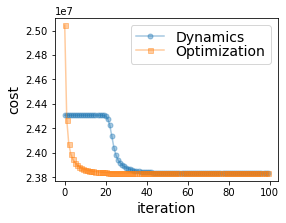

In [23]:
dashboard_misc.plot_cost(cost_dyn, cost_opt)

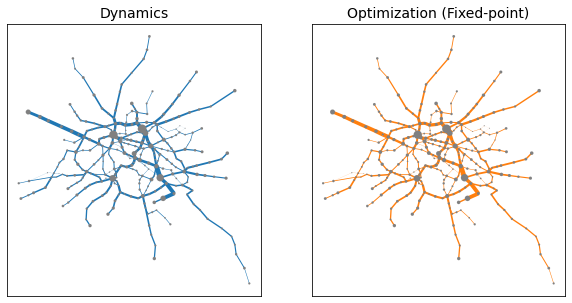

In [24]:
dashboard_misc.plot_network(graph, forcing, flux_dyn, flux_opt)